In [32]:
import numpy as np
import pandas as pd
Edges = pd.read_csv("https://raw.githubusercontent.com/cshen6/GraphNN/main/Data/Lastfm_Asia/lastfm_asia_edges.csv")
Edges

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478
...,...,...
27801,7488,7564
27802,7505,7579
27803,7533,7536
27804,7569,7587


In [33]:
Edges = np.array(Edges)
Edges

array([[   0,  747],
       [   1, 4257],
       [   1, 2194],
       ...,
       [7533, 7536],
       [7569, 7587],
       [7580, 7595]])

In [34]:
Target = pd.read_csv("https://raw.githubusercontent.com/cshen6/GraphNN/main/Data/Lastfm_Asia/lastfm_asia_target.csv")
Target = Target.drop(columns="id")
Target

,target
0,8
1,17
2,3
3,17
4,5
...,...
7619,10
7620,10
7621,0
7622,17


In [35]:
y = np.array(Target)
y,y.max()

(array([[ 8],
        [17],
        [ 3],
        ...,
        [ 0],
        [17],
        [11]]),
 17)

In [36]:
A = np.zeros((7624,7624))
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
for i in range (0,7624):
    A[Edges[i,0],Edges[i,1]]=1
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Split Data

In [38]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=5)
for train_index, test_index in rkf.split(A):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = A[train_index], A[test_index]
     y_train, y_test = y[train_index], y[test_index]

TRAIN: [   3    4    5 ... 7621 7622 7623] TEST: [   0    1    2 ... 7609 7613 7619]
TRAIN: [   0    1    2 ... 7620 7621 7623] TEST: [   4   13   15 ... 7616 7617 7622]
TRAIN: [   0    1    2 ... 7620 7621 7622] TEST: [   5    8   12 ... 7615 7618 7623]
TRAIN: [   0    1    2 ... 7620 7622 7623] TEST: [   3   10   16 ... 7600 7612 7621]
TRAIN: [   0    1    2 ... 7621 7622 7623] TEST: [  18   25   36 ... 7566 7591 7620]
TRAIN: [   0    1    2 ... 7620 7622 7623] TEST: [   5    8   12 ... 7613 7617 7621]
TRAIN: [   0    1    2 ... 7620 7621 7623] TEST: [   6   16   23 ... 7611 7615 7622]
TRAIN: [   0    2    3 ... 7621 7622 7623] TEST: [   1   18   28 ... 7607 7609 7612]
TRAIN: [   1    3    4 ... 7621 7622 7623] TEST: [   0    2   10 ... 7614 7616 7619]
TRAIN: [   0    1    2 ... 7619 7621 7622] TEST: [   3    4    7 ... 7618 7620 7623]
TRAIN: [   0    2    3 ... 7619 7620 7622] TEST: [   1    7   10 ... 7613 7621 7623]
TRAIN: [   0    1    2 ... 7621 7622 7623] TEST: [  12   16   18 

In [39]:
X_train.shape,X_test.shape

((6100, 7624), (1524, 7624))

In [40]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=5)
for train_index, test_index in rkf.split(A):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = A[train_index], A[test_index]
     y_train, y_test = y[train_index], y[test_index]
     X1 = X_train.transpose()
     X_train, X_test = X1[train_index], X1[test_index]

TRAIN: [   3    4    5 ... 7621 7622 7623] TEST: [   0    1    2 ... 7609 7613 7619]
TRAIN: [   0    1    2 ... 7620 7621 7623] TEST: [   4   13   15 ... 7616 7617 7622]
TRAIN: [   0    1    2 ... 7620 7621 7622] TEST: [   5    8   12 ... 7615 7618 7623]
TRAIN: [   0    1    2 ... 7620 7622 7623] TEST: [   3   10   16 ... 7600 7612 7621]
TRAIN: [   0    1    2 ... 7621 7622 7623] TEST: [  18   25   36 ... 7566 7591 7620]
TRAIN: [   0    1    2 ... 7620 7622 7623] TEST: [   5    8   12 ... 7613 7617 7621]
TRAIN: [   0    1    2 ... 7620 7621 7623] TEST: [   6   16   23 ... 7611 7615 7622]
TRAIN: [   0    2    3 ... 7621 7622 7623] TEST: [   1   18   28 ... 7607 7609 7612]
TRAIN: [   1    3    4 ... 7621 7622 7623] TEST: [   0    2   10 ... 7614 7616 7619]
TRAIN: [   0    1    2 ... 7619 7621 7622] TEST: [   3    4    7 ... 7618 7620 7623]
TRAIN: [   0    2    3 ... 7619 7620 7622] TEST: [   1    7   10 ... 7613 7621 7623]
TRAIN: [   0    1    2 ... 7621 7622 7623] TEST: [  12   16   18 

In [41]:
X_train.shape,X_test.shape

((6100, 6100), (1524, 6100))

# LDA(A,y)

In [42]:
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
begin = time.time()
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train.ravel())
LDAacc = clf.score(X_test, y_test)
print(LDAacc)
time.sleep(1) 
end = time.time()
print(f"Total runtime of the program is {end - begin}")

0.4356955380577428
Total runtime of the program is 142.88495516777039


# SVD with LDA

In [43]:
from scipy import linalg
begin1 = time.time()
U, s, VT = linalg.svd(A)
newx=[]
for c in range(1,10) :
   newx.append(U[:,0:c]*s[0:c]**0.5)
clf2 = LinearDiscriminantAnalysis()
SVDaccuracy=[]
for i in range(0,9):
    clf.fit(newx[i], y.ravel())
    SVDaccuracy.append(clf.score(newx[i], y.ravel()))
print(SVDaccuracy)
time.sleep(2) 
end1 = time.time()
print(f"Total runtime of the program is {end1 - begin1}")

[0.21511017838405036, 0.21694648478488981, 0.22730849947534104, 0.229800629590766, 0.23176810073452256, 0.23216159496327388, 0.23478488982161594, 0.23491605456453304, 0.23885099685204617]
Total runtime of the program is 201.73337197303772


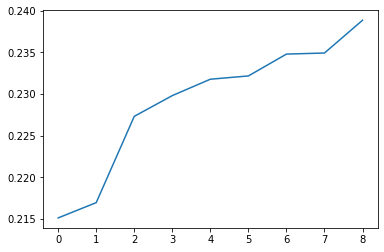

In [44]:
import matplotlib.pyplot as plt
plt.plot(SVDaccuracy)

# MLP(z,y)

In [45]:
w = np.zeros((6100,18))
for x in range(0,6100):
    i=int(y_train[x])
    w[x][i]=1
w

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
z_train=np.matmul(X_train,w)
z_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
z_test = np.matmul(X_test,w)
z_test,z_test.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [3., 0., 0., ..., 0., 0., 0.]]),
 (1524, 18))

In [48]:
from sklearn.neural_network import MLPClassifier
begin2 = time.time()
clf3 = MLPClassifier(random_state=2, max_iter=1000)
clf3.fit(z_train, y_train.ravel())
ZYAcc = clf3.score(z_test, y_test)
print(ZYAcc)
time.sleep(3) 
end2 = time.time()
print(f"Total runtime of the program is {end2 - begin2}")

0.4744094488188976
Total runtime of the program is 10.74592399597168


# LDA(z,y)

In [49]:
begin3 = time.time()
clf4 = LinearDiscriminantAnalysis()
clf4.fit(z_train,y_train.ravel())
ZYLDA = clf4.score(z_test, y_test.ravel())
print(ZYLDA)
time.sleep(4) 
end3 = time.time()
print(f"Total runtime of the program is {end3 - begin3}")

0.4744094488188976
Total runtime of the program is 4.039222002029419
